In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [2]:
# Load the training dataset
instagram_df_train=pd.read_csv(r"C:\Users\HP\Downloads\train.csv") #update your path 
instagram_df_train


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
# Load the testing data
instagram_df_test=pd.read_csv(r"C:\Users\HP\Downloads\test.csv")   #update your path
instagram_df_test


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [5]:
instagram_df_train.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
instagram_df_train.tail()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [7]:
# Getting dataframe info
instagram_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [9]:
# Checking if null values exist
instagram_df_train.isnull().sum()


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [10]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()


profile pic
1    404
0    172
Name: count, dtype: int64

In [11]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()


fake
0    288
1    288
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_11420\3508162742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


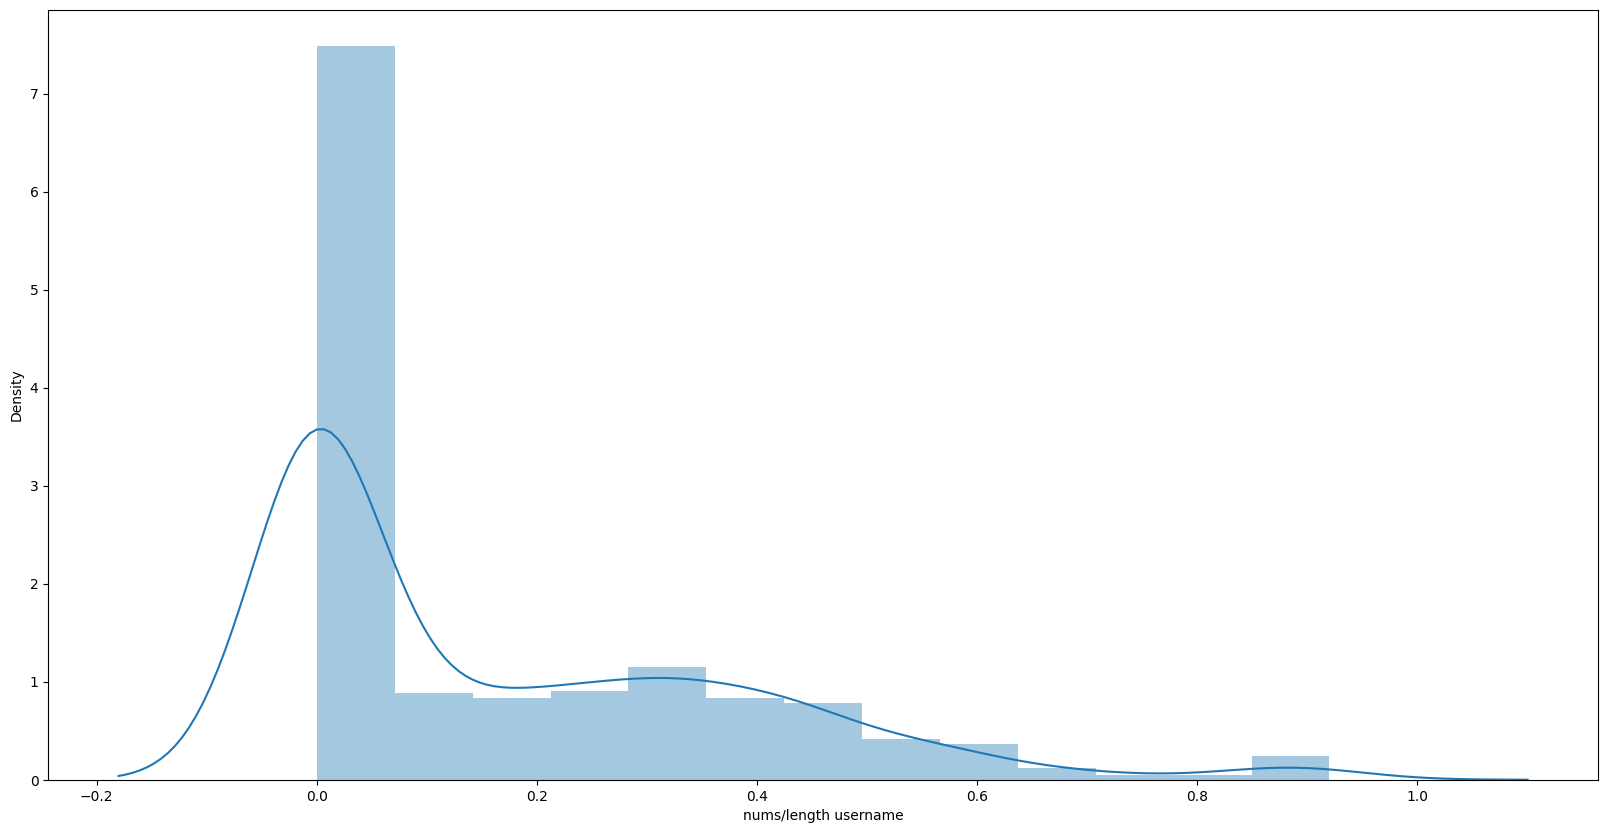

In [12]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])
plt.show()

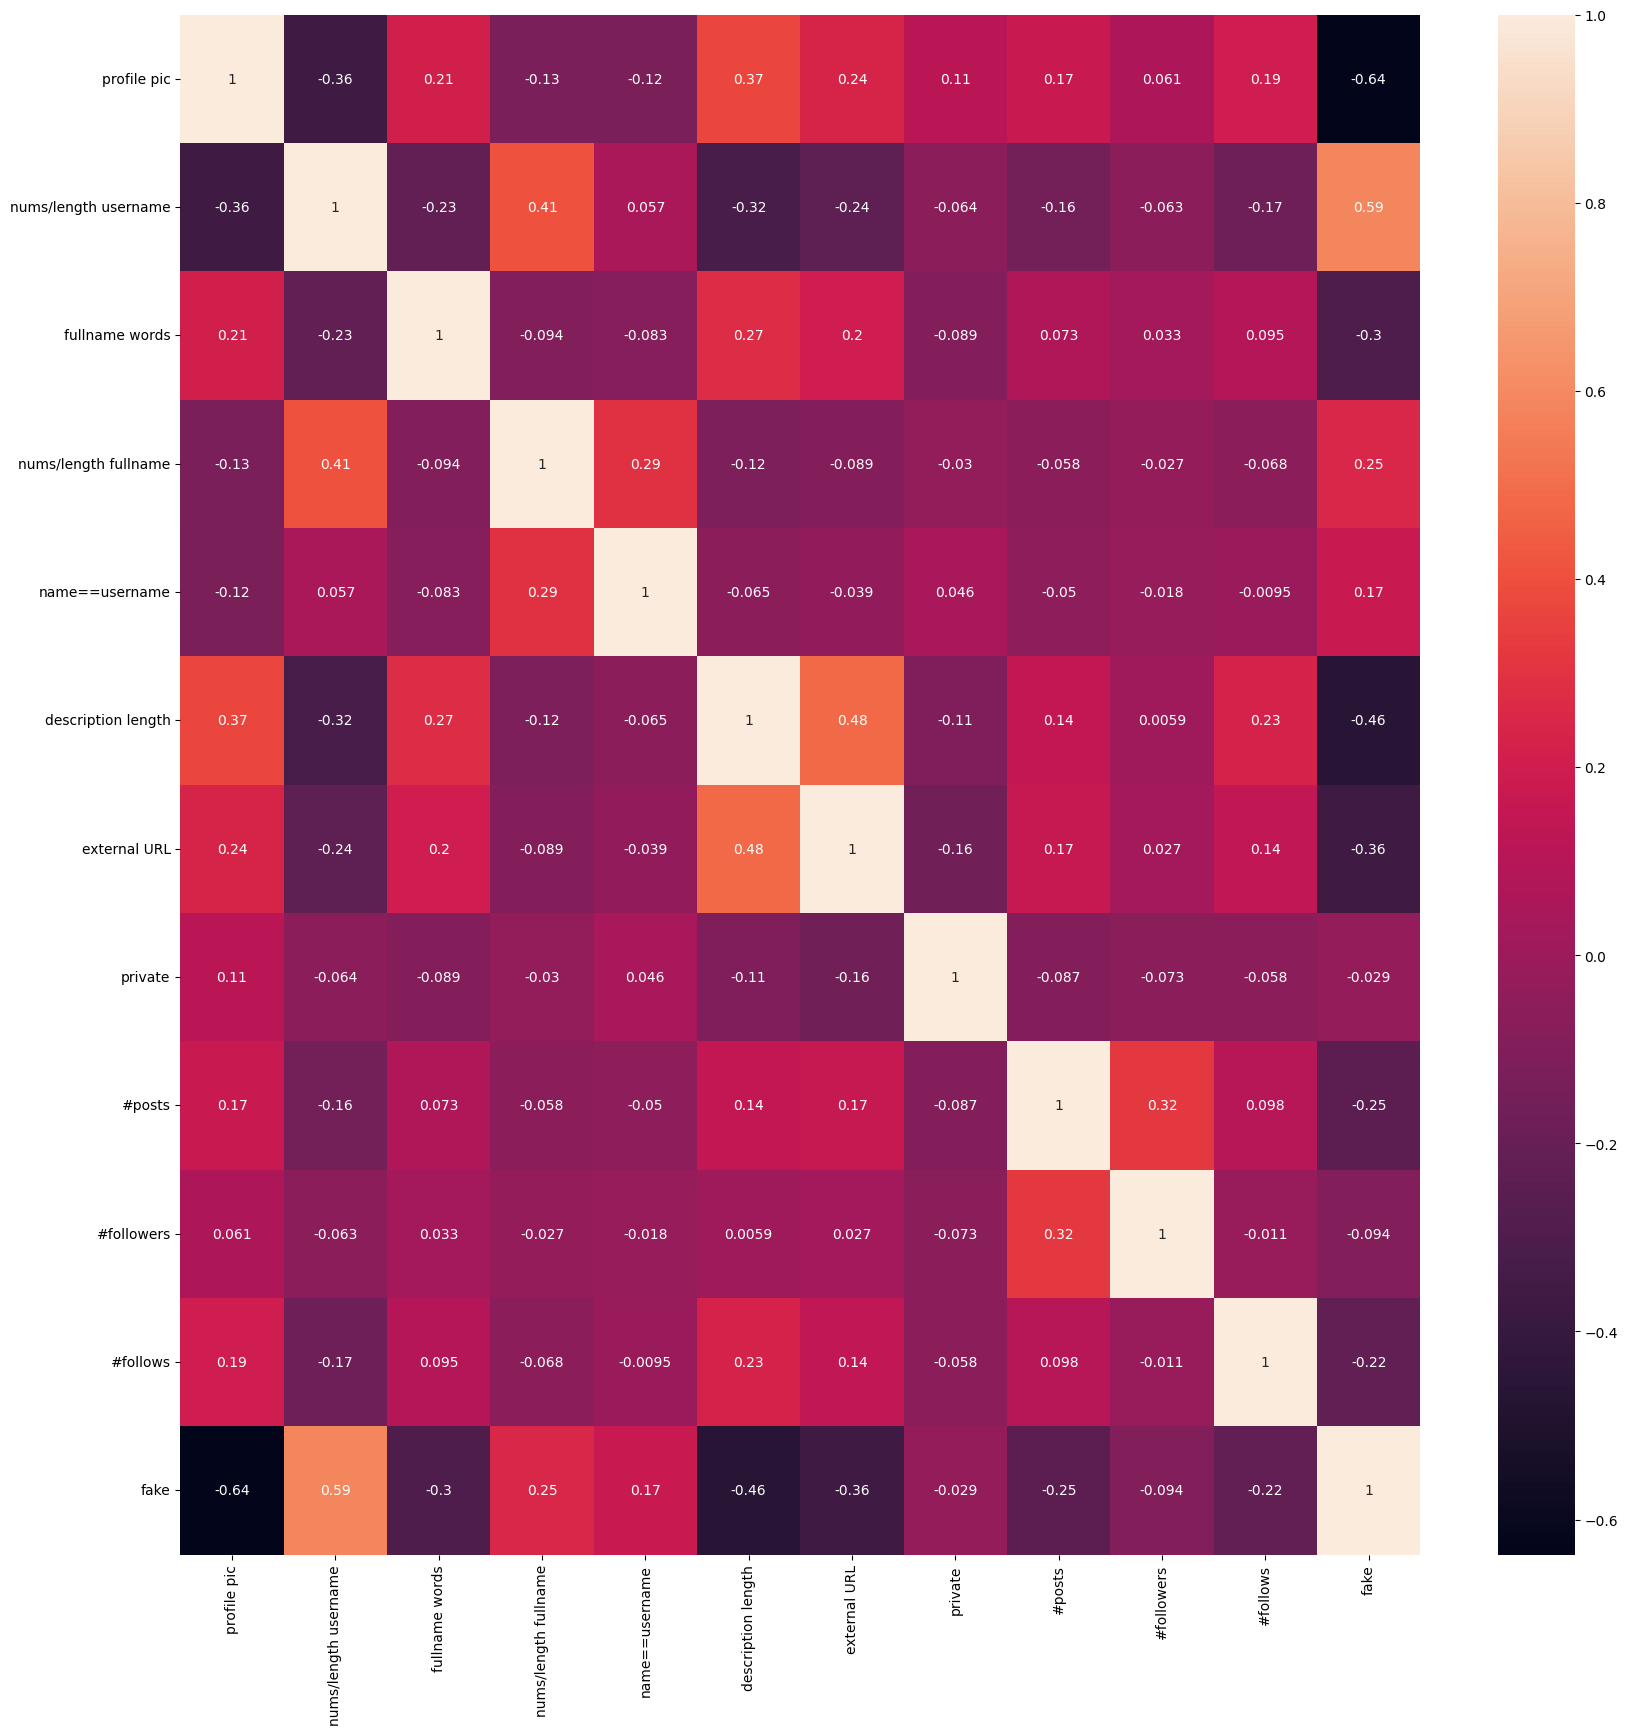

In [13]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()


In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate features and labels
X_train = instagram_df_train.drop(columns=['fake'])
y_train = instagram_df_train['fake']
X_test = instagram_df_test.drop(columns=['fake'])
y_test = instagram_df_test['fake']

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    max_depth=5,          # Increase max_depth
    learning_rate=0.01,   # Reduce learning rate
    n_estimators=500,     # Increase n_estimators for more training rounds
    gamma=0.2,            # Add gamma regularization
    min_child_weight=1,   # Add min_child_weight regularization
    objective='binary:logistic',
    random_state=42
)

# Fit the XGBoost classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9
Confusion Matrix:
[[54  6]
 [ 6 54]]


[0]	validation_0-error:0.05035	validation_0-logloss:0.68522	validation_1-error:0.13333	validation_1-logloss:0.68656
[1]	validation_0-error:0.05208	validation_0-logloss:0.67762	validation_1-error:0.13333	validation_1-logloss:0.67992
[2]	validation_0-error:0.05208	validation_0-logloss:0.67016	validation_1-error:0.13333	validation_1-logloss:0.67340
[3]	validation_0-error:0.05382	validation_0-logloss:0.66283	validation_1-error:0.13333	validation_1-logloss:0.66703
[4]	validation_0-error:0.05382	validation_0-logloss:0.65565	validation_1-error:0.13333	validation_1-logloss:0.66076
[5]	validation_0-error:0.05556	validation_0-logloss:0.64859	validation_1-error:0.12500	validation_1-logloss:0.65469
[6]	validation_0-error:0.05556	validation_0-logloss:0.64166	validation_1-error:0.12500	validation_1-logloss:0.64859
[7]	validation_0-error:0.05556	validation_0-logloss:0.63486	validation_1-error:0.12500	validation_1-logloss:0.64274
[8]	validation_0-error:0.05556	validation_0-logloss:0.62818	validation_1

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-error:0.05903	validation_0-logloss:0.48219	validation_1-error:0.10833	validation_1-logloss:0.50891
[36]	validation_0-error:0.05903	validation_0-logloss:0.47779	validation_1-error:0.10833	validation_1-logloss:0.50496
[37]	validation_0-error:0.05903	validation_0-logloss:0.47351	validation_1-error:0.10833	validation_1-logloss:0.50115
[38]	validation_0-error:0.05903	validation_0-logloss:0.46928	validation_1-error:0.10833	validation_1-logloss:0.49759
[39]	validation_0-error:0.05903	validation_0-logloss:0.46506	validation_1-error:0.10833	validation_1-logloss:0.49382
[40]	validation_0-error:0.05903	validation_0-logloss:0.46091	validation_1-error:0.10833	validation_1-logloss:0.49020
[41]	validation_0-error:0.05903	validation_0-logloss:0.45686	validation_1-error:0.10833	validation_1-logloss:0.48683
[42]	validation_0-error:0.05903	validation_0-logloss:0.45287	validation_1-error:0.10833	validation_1-logloss:0.48345
[43]	validation_0-error:0.05903	validation_0-logloss:0.44889	val

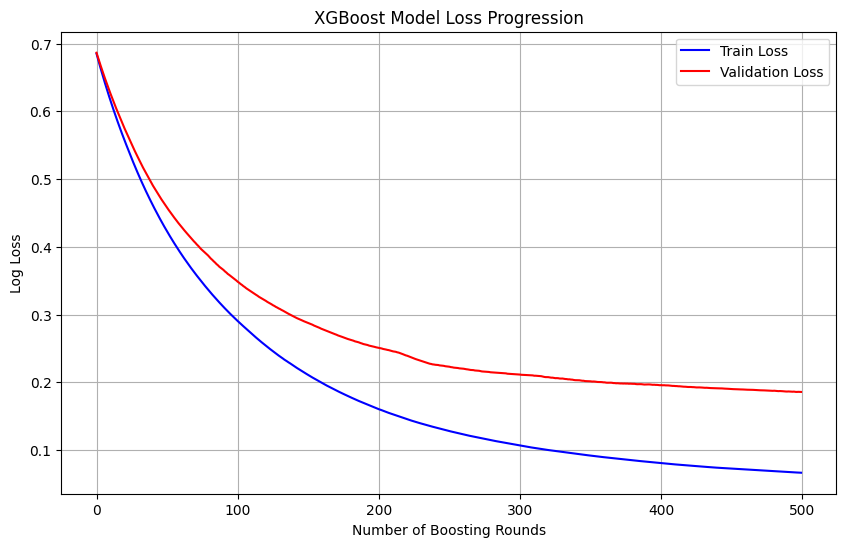

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9
Confusion Matrix:
[[54  6]
 [ 6 54]]


In [15]:
# Fit the XGBoost classifier on the training data, and monitor loss progression
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_classifier.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

# Get the evaluation results during training
results = xgb_classifier.evals_result()

# Extract the training and validation loss values
train_losses = results["validation_0"]["logloss"]
val_losses = results["validation_1"]["logloss"]

# Plot the loss progression
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(val_losses, label="Validation Loss", color="red")
plt.xlabel("Number of Boosting Rounds")
plt.ylabel("Log Loss")
plt.title("XGBoost Model Loss Progression")
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

In [26]:
# Define a function to predict Instagram account authenticity
def predict_instagram_account(account_data):
    # Ensure that the feature names in account_data match those used during training
    expected_features = list(X_train.columns)

    # Create a dictionary that matches the expected feature names
    input_data = {feature: [account_data.get(feature, 0)] for feature in expected_features}

    # Create a DataFrame from the input data
    input_df = pd.DataFrame(input_data)

    # Use the trained XGBoost model to predict
    prediction = xgb_classifier.predict(input_df)

    if prediction[0] == 1:
        return "Predicted: Fake Instagram account"
    else:
        return "Predicted: Real Instagram account"

#setting testing parameters for prediction,change the parameters and see the results for real and fake profiles. 
new_account_data = {
    'profile pic': 1,               # Has a profile picture
    'nums/length username': 1,   # Normal character count in username
    'fullname words': 3,            # Normal number of words in full name
    'nums/length fullname': 0.9,   # Normal character count in full name
    'name==username': 1,           # Name is equal to username
    'description length': 100,      # A longer description
    'external URL': 1,             # Has an external URL
    'private': 1,                  # Not a private account
    '#posts': 50,                 # High number of posts
    '#followers': 100,           # High number of followers
    '#follows': 10                              # High number of accounts being followed
}


prediction_result = predict_instagram_account(new_account_data)
print(prediction_result)


Predicted: Real Instagram account
